In [1]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [7]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [9]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
 gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
gold_data.shape

(2290, 6)

In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [15]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
gold_data_numeric = gold_data.drop(columns=['Date'])

# Calculate the correlation matrix
correlation = gold_data_numeric.corr()

<Axes: >

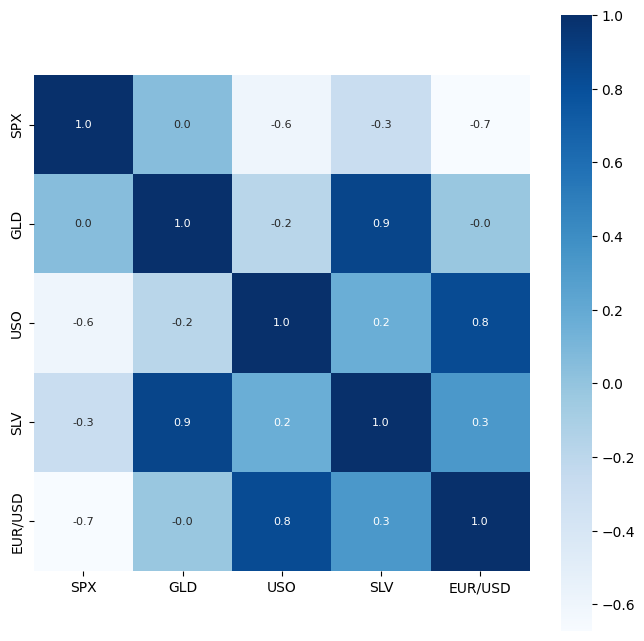

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
#coorelation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-24-f6b7dbab4541>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='purple')


<Axes: xlabel='GLD', ylabel='Density'>

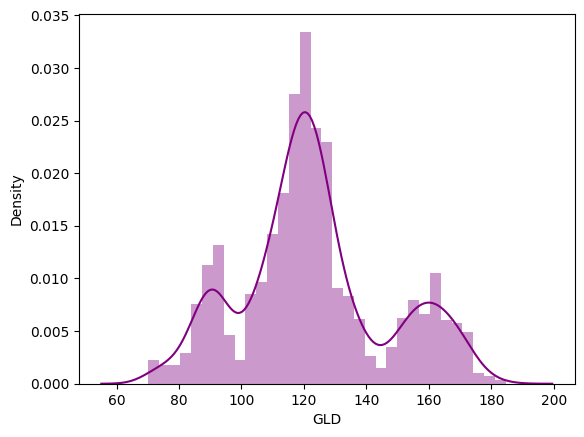

In [24]:
#check the distribution of gold price
sns.distplot(gold_data['GLD'],color='purple')

Splitting features and Target

In [34]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']


In [35]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING INTO TRAINING DATA AND TEST DATA

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAININNG

In [38]:
 regressor=RandomForestRegressor(n_estimators=100)

In [41]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.4338994   81.8836     115.7848002  127.55420021 120.96990127
 154.76539762 150.55599817 126.17670008 117.51329876 126.01300007
 116.60340109 171.52030089 141.76089821 167.38369808 115.17449973
 117.79980032 138.12390368 170.46240074 159.40320347 158.85199942
 155.09619988 125.55970048 175.31159949 157.22910326 125.18580021
  93.57979946  77.2065003  120.59670016 119.1011995  167.54149976
  88.21440026 125.08579987  91.2760009  117.58920017 121.17489904
 136.30460043 115.56350127 115.81840058 147.75709991 107.15080086
 104.27890221  87.23989788 126.55620017 118.0539996  155.37169909
 119.57640018 108.28640034 108.14089849  93.19560044 127.13539772
  74.74880058 113.68639915 121.41010008 111.34899923 119.00859919
 120.8326992  159.63149971 167.68260102 146.76179685  85.65949848
  94.26430029  86.78389877  90.50059988 119.01610071 126.45120061
 127.50089978 170.98509975 122.28009949 117.40619892  98.54180053
 168.44100086 142.78719808 132.15310276 121.21590216 121.0084996
 119.704300

In [43]:
#R sqaured error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9892163026629761


In [44]:
#another way of comparing actual values and predicted values in matplot
Y_test = list(Y_test)

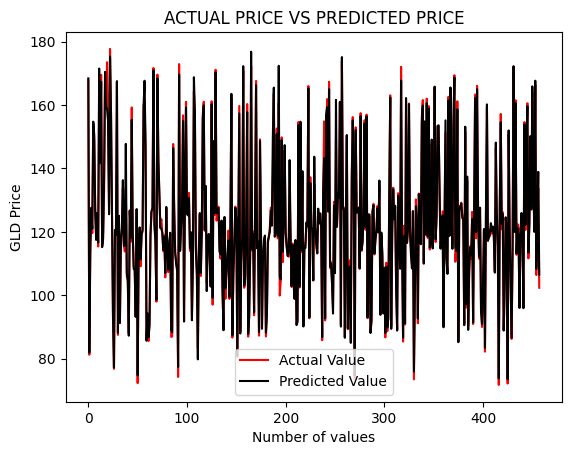

In [47]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='black',label='Predicted Value')
plt.title('ACTUAL PRICE VS PREDICTED PRICE')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()